### Short project description: The aim of this mini project is to use Machine Learning Algorithms to predict whether a client would respond positively or negatively to a marketing  campaign.

##### Please take note of the following:
- In order to avoid any package version incompatibilities, consider checking this work on Google collab. I have tested and ran it successfully on Google Collab.
- Some of the models take time to run (1-2 minutes depending on the compute capabilities of your machine). Exercise patience while those cells run
- Contact me at abdulaihalidu008@gmail.com if you ever run into an error and need any clarifications on anything

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, log_loss, \
classification_report, precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTETomek

%matplotlib inline
sns.set()

### Import the dataset

##### For convenience, I have uploaded the dataset to GitHub. The url to fetch the data is given below. In case, you have no internet connection uncomment the line indicated in the next cell and specify the path to the dataset on your local machine accorddingly

In [2]:
dataset_url = ('https://raw.githubusercontent.com/simulate111/mini-project-1/main/bank-additional-full.csv')

In [3]:
# Uncomment the line below if you have the dataset available on your local machine and want to use it
# instead of fetching it from the internet
# banking_dataset = pd.read_csv(path_to_dataset)

# In case you decided to use the dataset on your local machine, comment the line below
banking_dataset = pd.read_csv(dataset_url, delimiter=";")

### Exploratory Data Analysis
##### Before proceeding, check for the basic info of the dataset, as well as making sure the dataset is complete and suitable for the task at hand

In [4]:
def data_exploration() -> None:
    """
        Print some general information about the dataset
    """
    print(f"There are {banking_dataset.shape[0]} samples and {banking_dataset.shape[1]} features in the original dataset\n\n")
    print("##################################### Info on the data types of each column ##################################")
    # Print the data types of each column and whether it contains null values or not
    print(f"{banking_dataset.info()}\n\n")
    print("##################################### Statistical summary of the numeric features ###########################")
    print(f"{banking_dataset.describe()}\n\n")
    print("##################################### Checking for null values, if any #######################################")
    print(f"{banking_dataset.isnull().sum()}\n\n")




# Call the function to display the infomation.
data_exploration()

There are 41188 samples and 21 features in the original dataset


##################################### Info on the data types of each column ##################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  in

In [5]:
print("##################################### Checking the first few rows of the dataset #############################")
banking_dataset.head()

##################################### Checking the first few rows of the dataset #############################


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


##################################### Checking the distribution of the target variable ################
Number of Positive responses(Yes): 4640 - 11.3%
Number of Negative responses(No): 36548 - 88.7%


##################################### Checking the percentage of people who suscribed #################


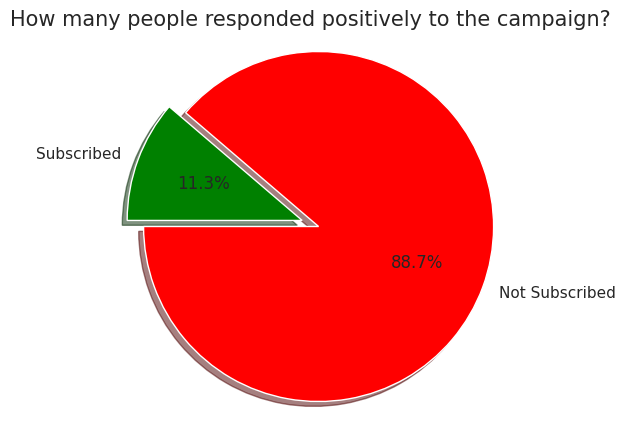

In [6]:
def get_statistics_of_the_target_variable() -> None:
    num_yes = banking_dataset[banking_dataset.y == 'yes'].shape[0]
    num_no = banking_dataset.shape[0] - num_yes
    total_responses = banking_dataset.shape[0]

    print("##################################### Checking the distribution of the target variable ################")
    print(f"Number of Positive responses(Yes): {num_yes} - {round(num_yes/total_responses, 3)*100}%")
    print(f"Number of Negative responses(No): {num_no} - {round(num_no/total_responses, 3)*100}%\n\n")

    print("##################################### Checking the percentage of people who suscribed #################")
    # Visualize the number of customers who subscribed and those who did not subscribe to the campaign
    labels = 'Not Subscribed' , 'Subscribed'
    value_counts = banking_dataset.y.value_counts()
    colors = ['red', 'green']
    explode = (0.1, 0.0)
    plt.pie(value_counts, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=180)
    plt.axis('equal')
    plt.title("How many people responded positively to the campaign?",fontsize=15)
    plt.plot()
    fig=plt.gcf()
    fig.set_size_inches(5,5)
    plt.show()

# call the method
get_statistics_of_the_target_variable()

##### As we can see, nearly 90% of the people did not respond positively to the campaign. This renders the dataset highly inbalanced, thus it will be necessary to tackle this issue once we are set to build our model(s)

In [7]:
# Get a list of categorical and numeric features
categorical_cols = list(banking_dataset.select_dtypes(include=['object']))
numerical_cols = list(banking_dataset.select_dtypes(exclude=['object']))

print(f"The categorical features in the dataset are: {categorical_cols}\n")
print(f"The numeric features in the dataset are: {numerical_cols}")

The categorical features in the dataset are: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

The numeric features in the dataset are: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


##################################### Distribution of each categorical variable ###################################


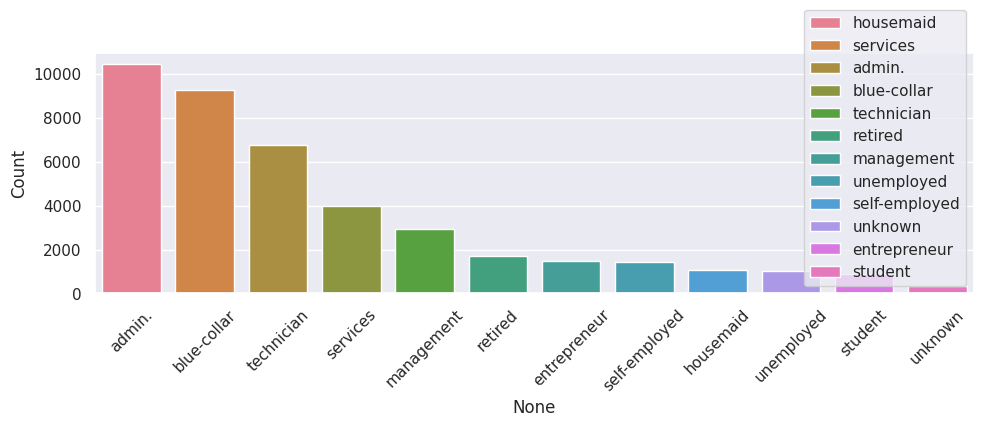

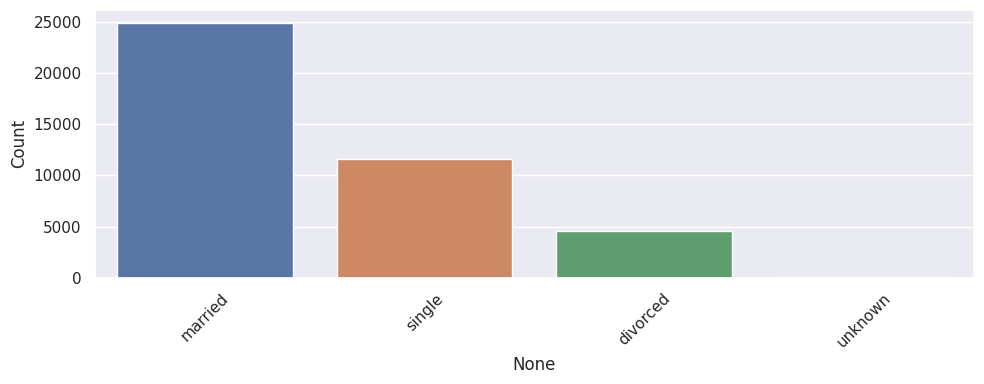

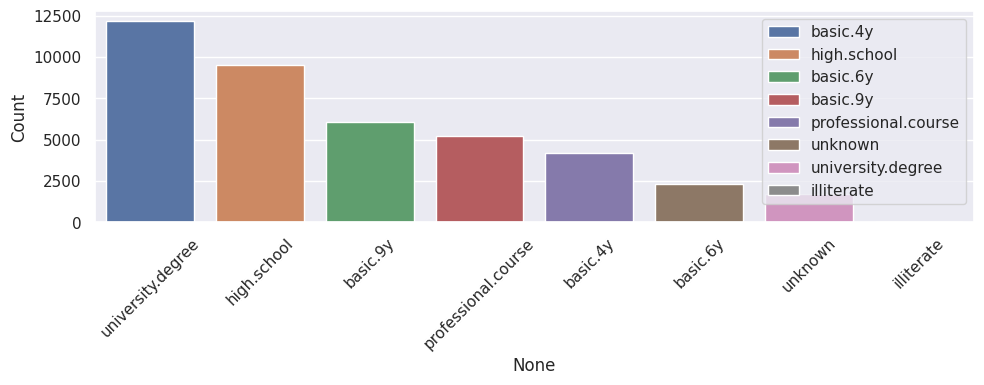

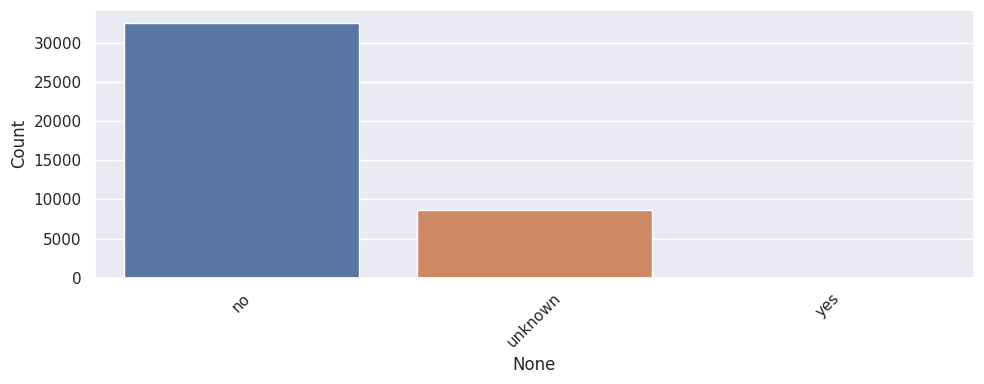

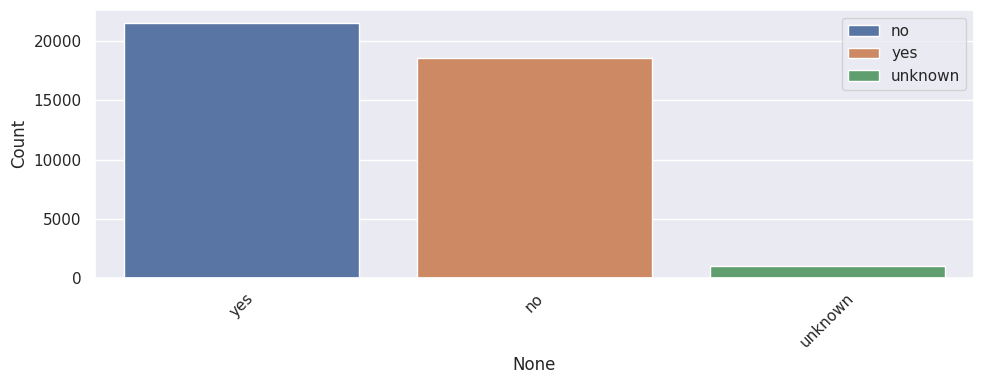

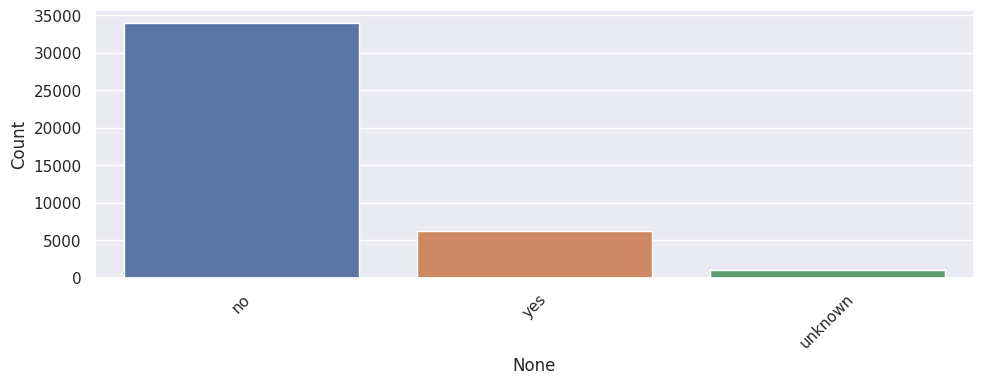

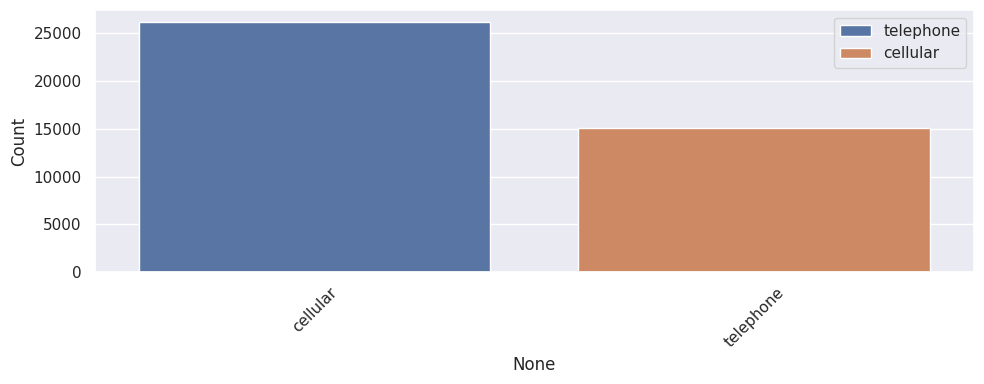

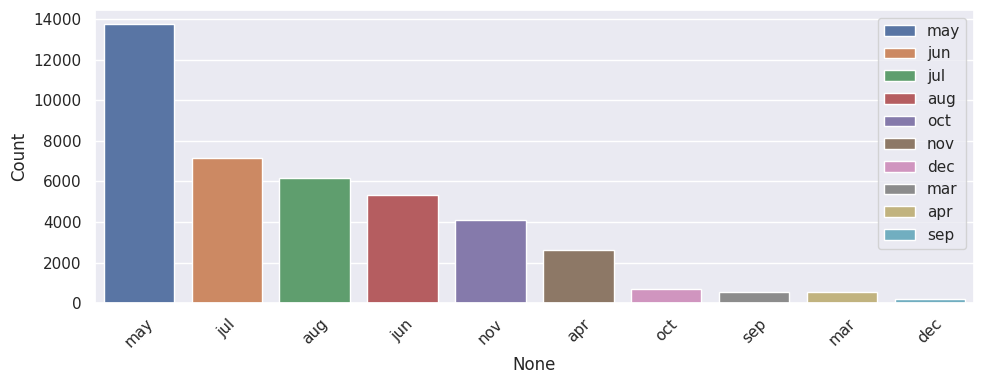

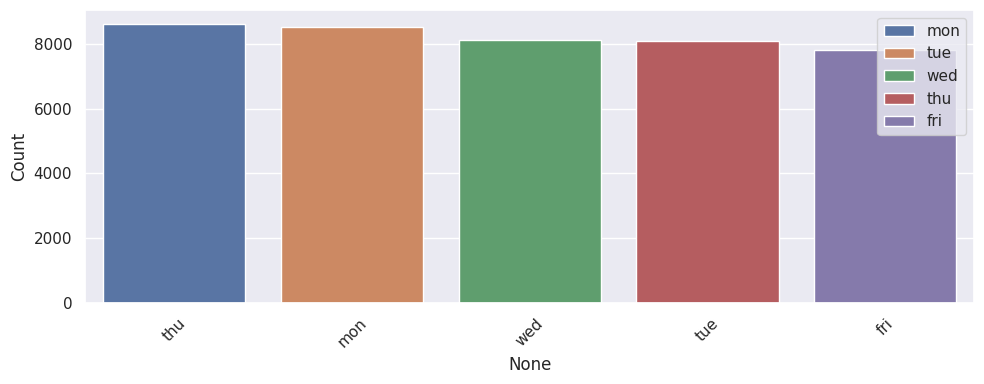

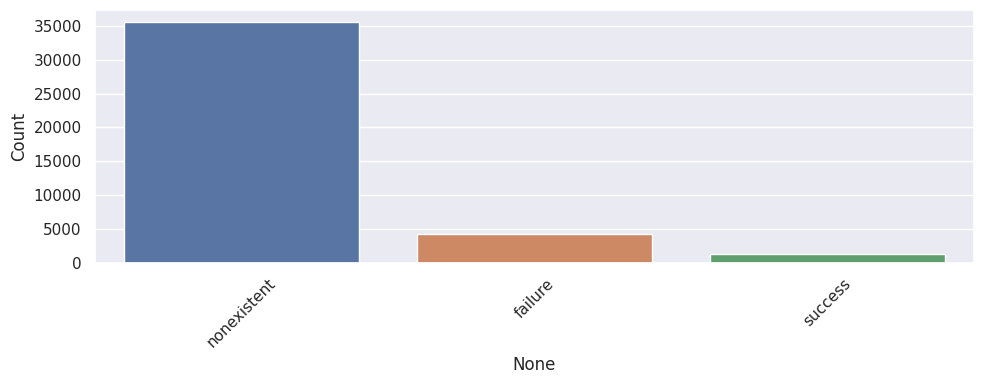

In [8]:
# Visualize the distribution of each categorical features using bar charts
print("##################################### Distribution of each categorical variable ###################################")
for col in categorical_cols[:-1]: # Exlude y, the target variable as we have already made a plot for it
    plt.figure(figsize=(10,4))
    sns.barplot(x=banking_dataset[col].value_counts().index,
                y=banking_dataset[col].value_counts().values, hue=banking_dataset[col].unique())
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    #plt.title(col)
    plt.tight_layout()

#### Let's visualize how each categorical feature with respect to the target variable (whether they responded to the campaign positively or negatively)

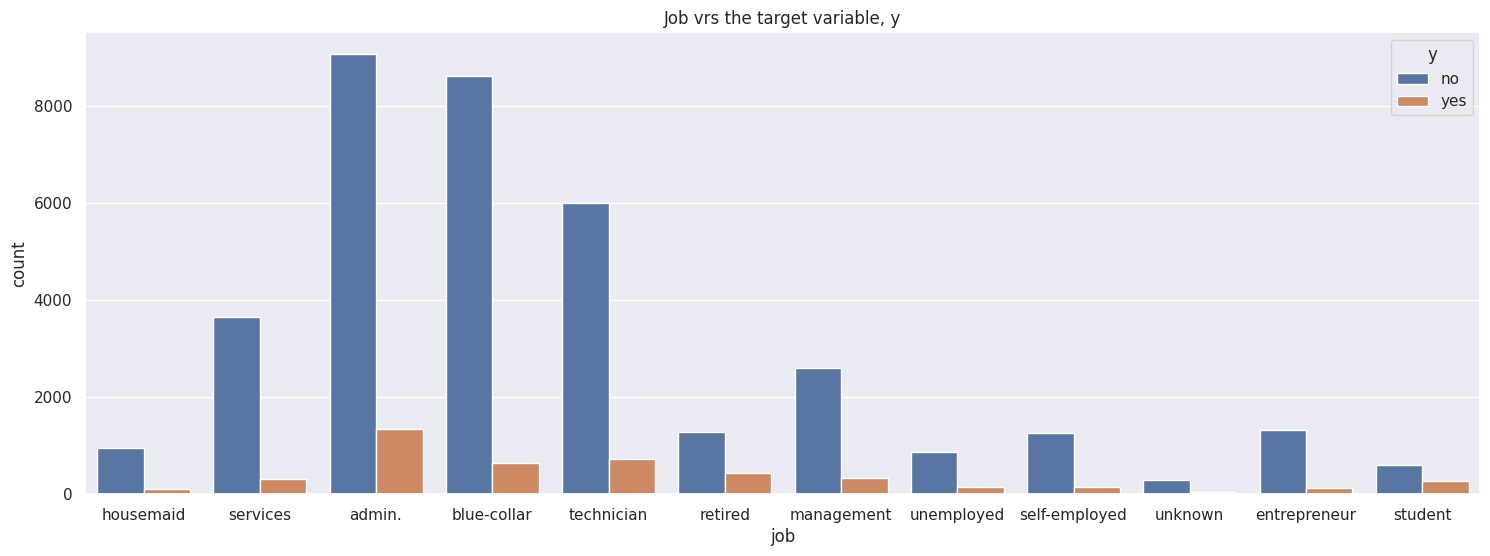

---------------------------------------------------------------------------------------------------------------


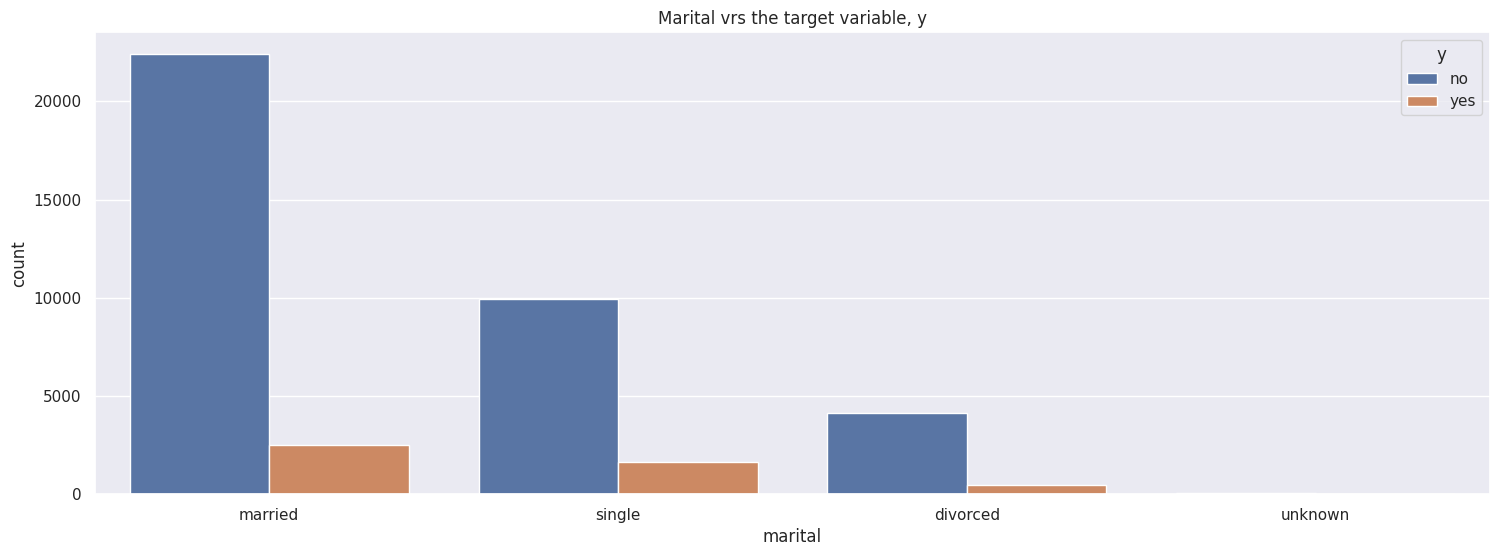

---------------------------------------------------------------------------------------------------------------


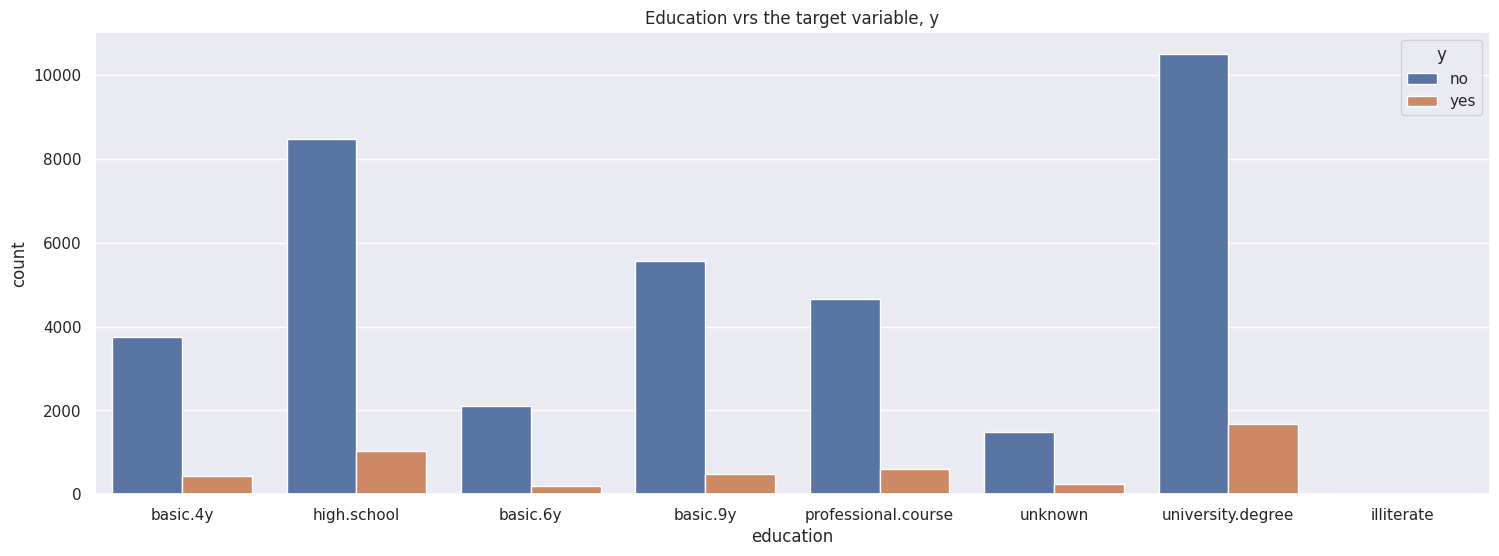

---------------------------------------------------------------------------------------------------------------


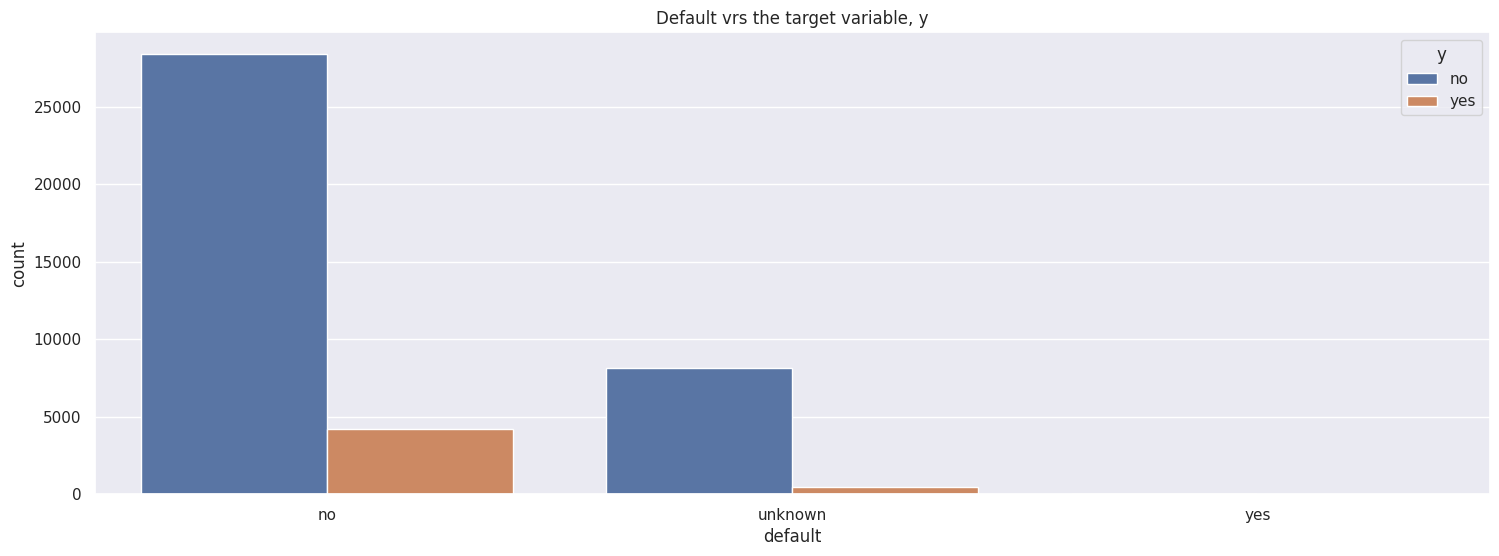

---------------------------------------------------------------------------------------------------------------


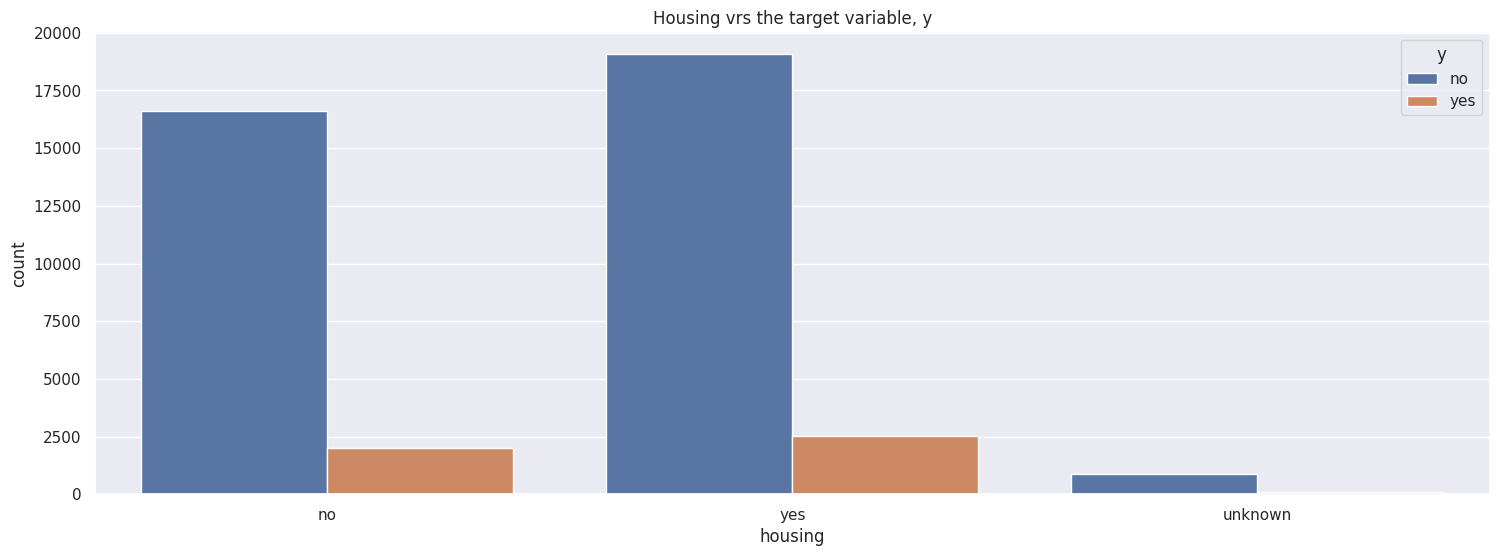

---------------------------------------------------------------------------------------------------------------


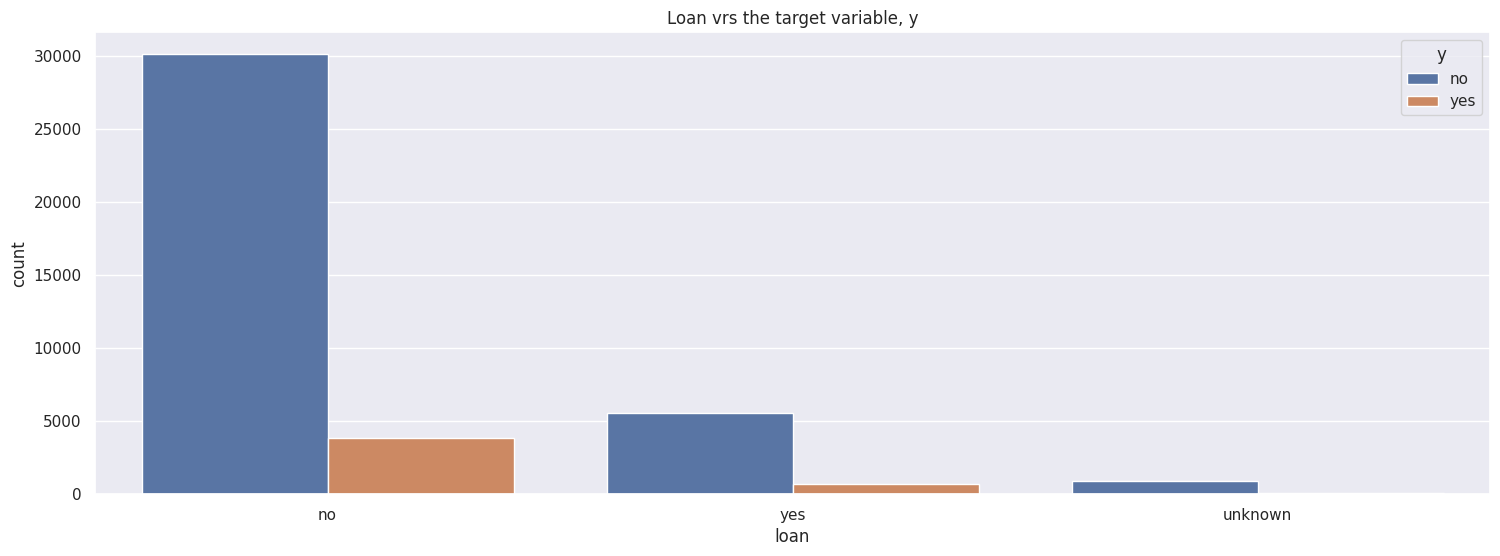

---------------------------------------------------------------------------------------------------------------


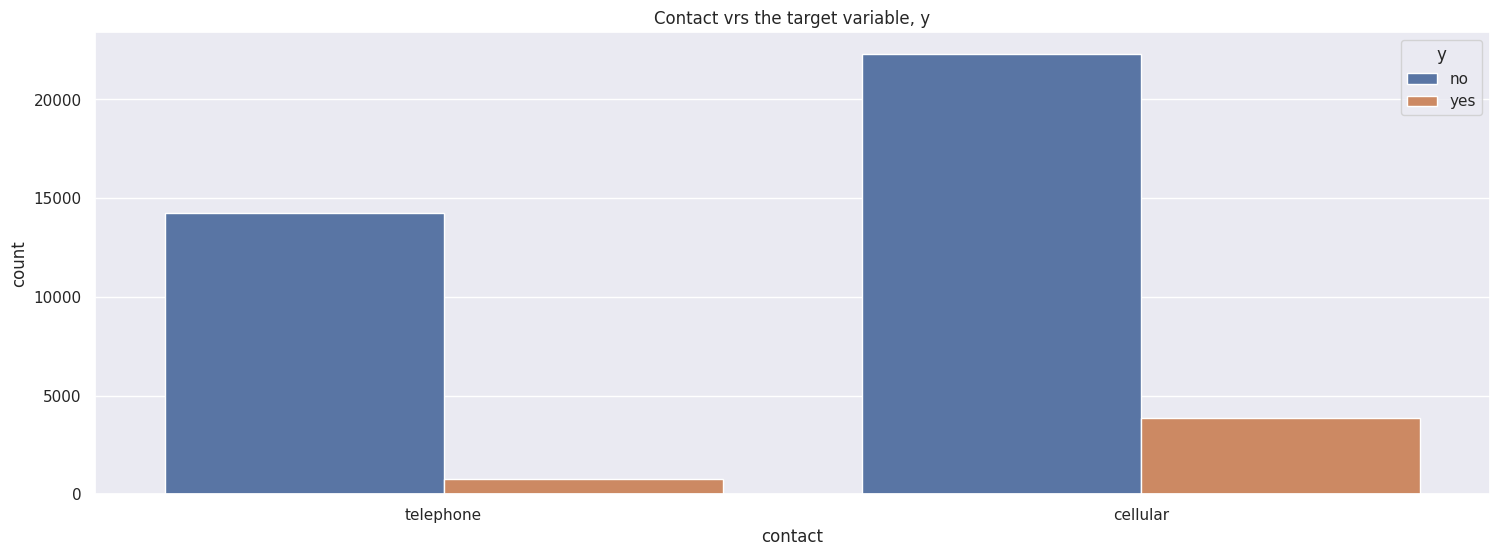

---------------------------------------------------------------------------------------------------------------


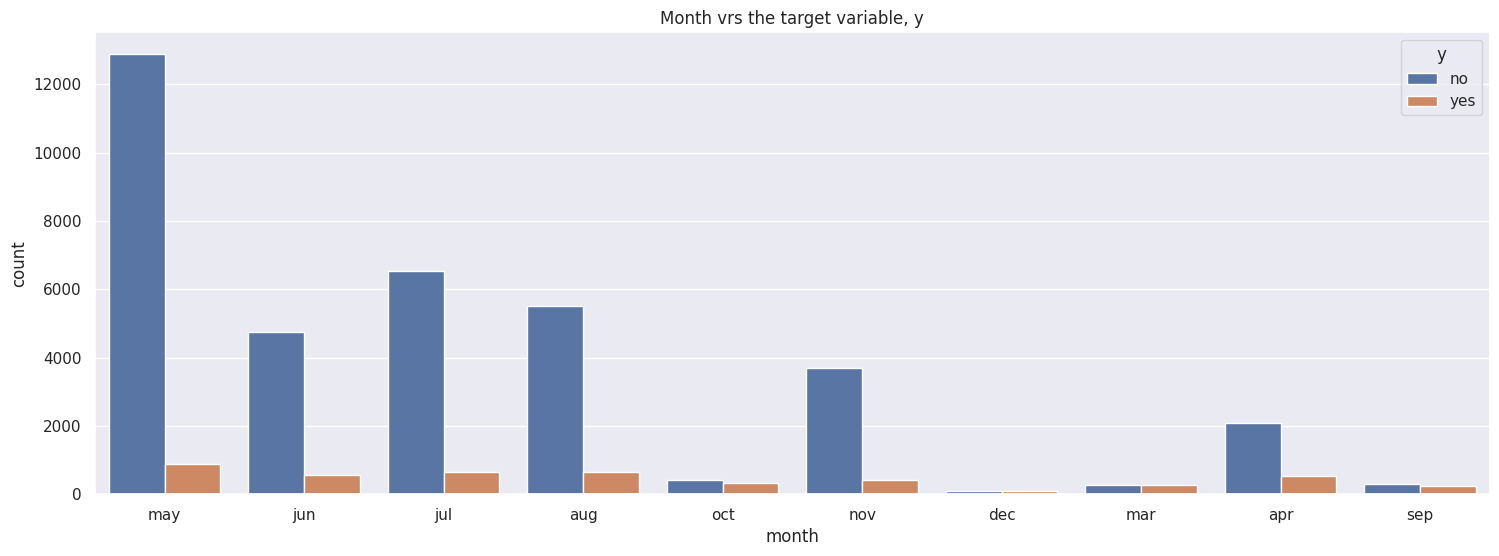

---------------------------------------------------------------------------------------------------------------


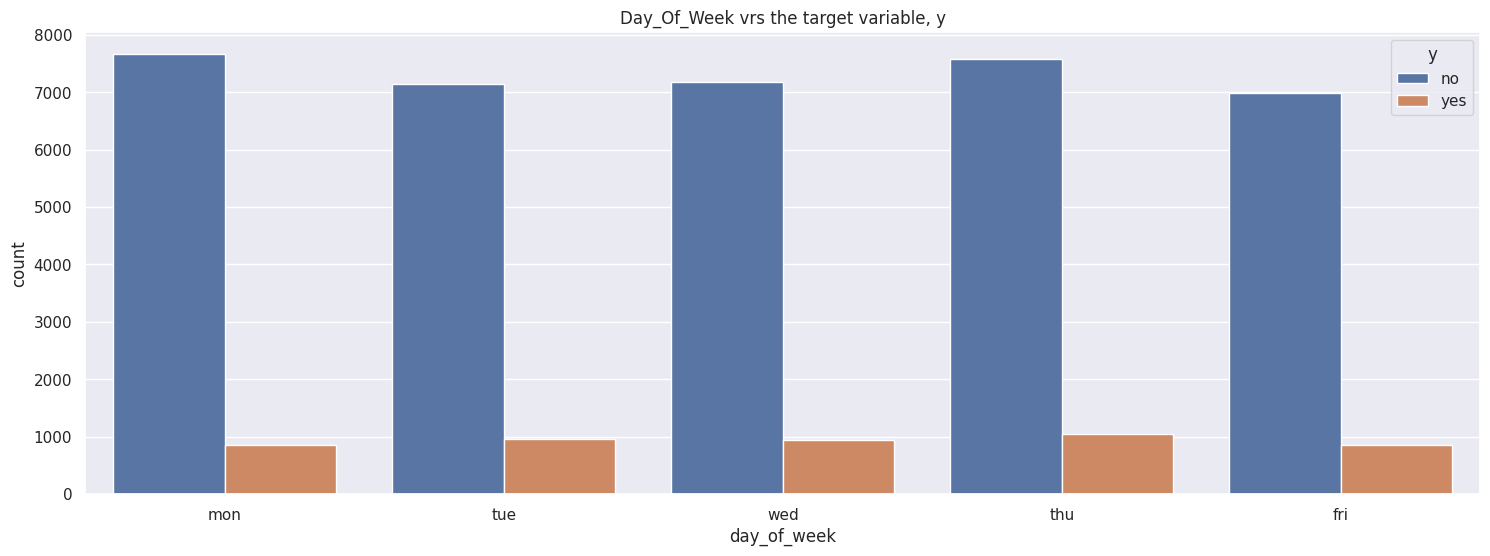

---------------------------------------------------------------------------------------------------------------


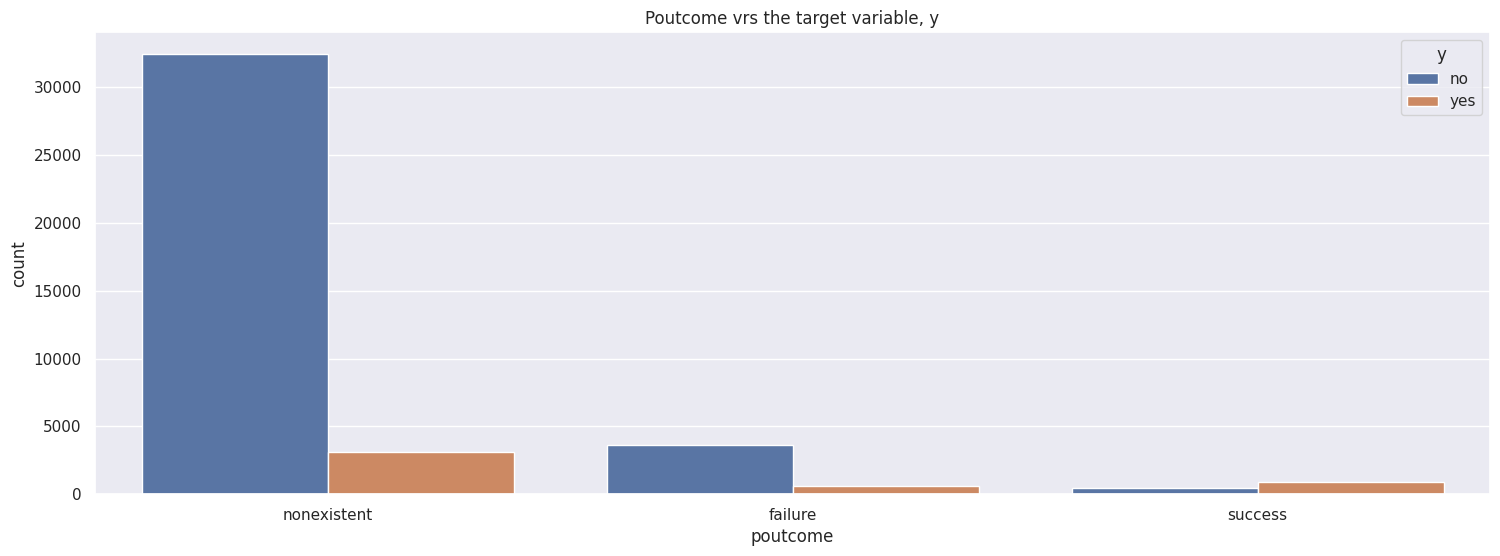

---------------------------------------------------------------------------------------------------------------


In [9]:
# define a method to carry out the task
def cat_feature_with_respect_2_target(categorical_cols) -> None:
    for col in categorical_cols[:-1]:
        plt.figure(figsize=(18,6))
        sns.countplot(data=banking_dataset, x=banking_dataset[col],hue=banking_dataset[categorical_cols[-1]])
        plt.title('{x} vrs the target variable, y'.format(x=col.title(),fontsize = 25))
        plt.show()
        print("---------------------------------------------------------------------------------------------------------------")
# call the method
cat_feature_with_respect_2_target(categorical_cols)

### General comments and observations on the graphs
 - Most people are contacted in May for the campaign
 - Most of the people contacted are non-defaluters. In addition, majority of them do not have loans
 - Most of the contacted people are married
 - Majority of the contacted people have a high school or university degree
 - Most people are contacted through the cell phone (cellular)
 - Top contacted clients are  'blue-collar', 'admin', or 'technician' by profession
 - The success rate is highest for individuals with a university-degree or high school certificate
 - In comparison, married people are more luckly to respond positively,  and have a higher positive response rate than the others.

##### Before moving to the next section, let's check the age distribution of the dataset

<Figure size 800x1200 with 0 Axes>

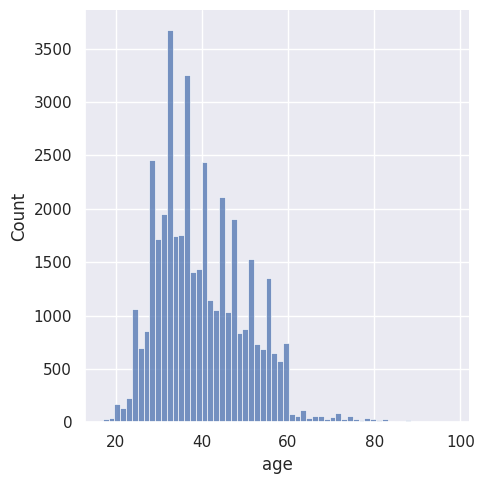

In [10]:
plt.figure(figsize=(8, 12),  layout='constrained')
sns.displot(banking_dataset["age"], bins=60)
plt.show()

#### The age distribution show above reveals that the campaign is targetted mostly towards people between age 20 andage 60; with of the people being between their late 20s and late 30s

### Data Peprocessing

In [11]:
# Convert the categorical features to numeric, and concatenate it with the numeric
def get_features(dataset: pd.DataFrame = banking_dataset) -> (pd.DataFrame, pd.Series):
    # convert the categorical features to numeric (the last in the list is the target feature, hence its exclusion)
    cat_2_numeric = pd.get_dummies(banking_dataset[categorical_cols[:-1]],
                                   dtype=int, prefix=categorical_cols[:-1], prefix_sep='_', drop_first=True)
    # concatenate the coverted categorical features to the numeric features
    input_features = pd.concat([banking_dataset[numerical_cols], cat_2_numeric], axis=1)
    # Transform the target variable
    targets = banking_dataset.y.map({"yes":1, "no": 0})

    # Return the the features
    return input_features,targets

# call the method
input_features, targets = get_features()
print(f"There are {input_features.shape[0]} Samples with {input_features.shape[1]} features in the newly transformed dataset")
input_features.head()

There are 41188 Samples with 53 features in the newly transformed dataset


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [12]:
# Check if the target variable was converted correctly
targets.unique()

array([0, 1])

In [13]:
numerical_cols_df = banking_dataset.loc[:, numerical_cols]
numerical_cols_df["target"] = targets
numerical_cols_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


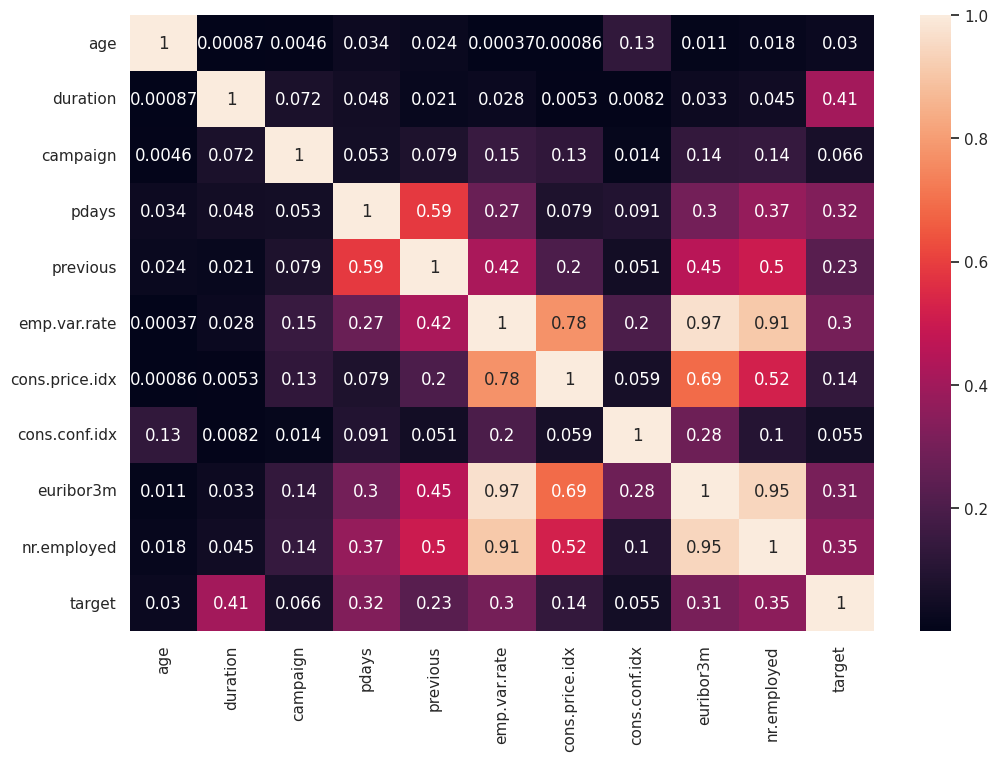

In [14]:
plt.subplots(figsize=(12,8))

numerical_cols_corr_mat = numerical_cols_df.corr().abs()
sns.heatmap(numerical_cols_corr_mat, annot=True)
plt.show()

##### As seen from the heatmap above, Some features are highly correlated: for instance the variables 'emp.var.rate','euribor3m', and 'nr.employed' aree highly correlated with one another. In addition to this, the feature that correlates with the target variable the most is the 'duration' feature. As per the description of this project, this variable is highly deterministic of the target variable. In addition, this feature is only known after the outcome of the campaign (after it is known whether a customer responds positively or not, to the campaign). For these highlighted reasons, the duration variable will not be included in implementing the ML models.

#### Using a Random Forest classifier to select the best features

In [15]:
# Drop the durattion feature variable
input_features.drop(['duration'],axis=1, inplace=True)

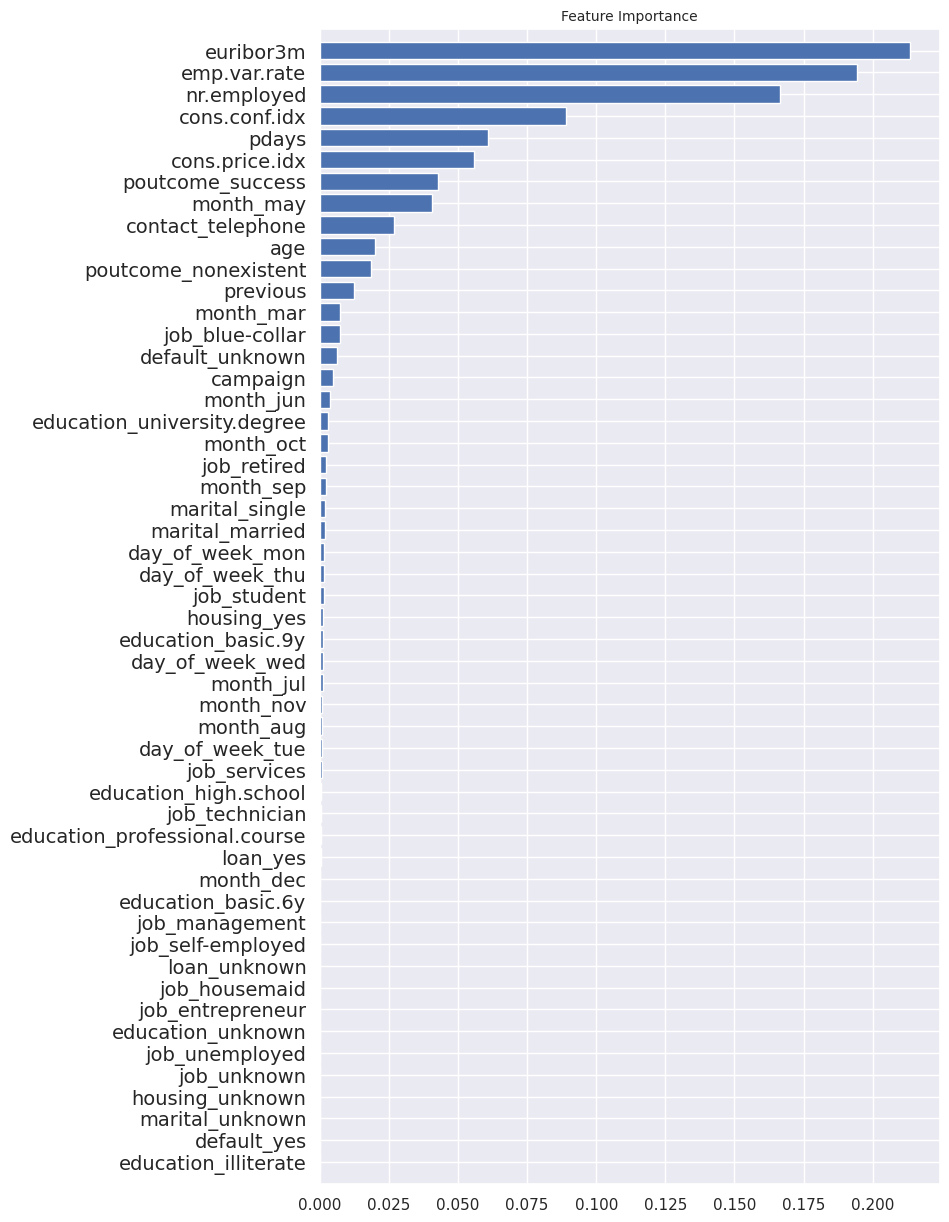

In [16]:

# Instantiate a decision tree classifier
rt_clf = RandomForestClassifier(class_weight='balanced', min_weight_fraction_leaf = 0.01, random_state=42)
# Fit the classifier to the data
rt_clf.fit(input_features, targets)
# Get the importance features
importances = rt_clf.feature_importances_
# Get the names of the input features
feature_names = input_features.columns
indices = np.argsort(importances)


def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(8,15))
    plt.title("Feature Importance", fontsize=10)
    plt.barh(range(len(indices)), importances[indices], color='b',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    plt.show()

feature_importance_graph(indices, importances, feature_names)


### Let's train tree-based models on the features selected by the random forest feature selection classifier  using the top 35 features

In [17]:

# Selecting the top 22 features
most_important_features = feature_names[indices[::-1]][:35]
most_important_features

Index(['euribor3m', 'emp.var.rate', 'nr.employed', 'cons.conf.idx', 'pdays',
       'cons.price.idx', 'poutcome_success', 'month_may', 'contact_telephone',
       'age', 'poutcome_nonexistent', 'previous', 'month_mar',
       'job_blue-collar', 'default_unknown', 'campaign', 'month_jun',
       'education_university.degree', 'month_oct', 'job_retired', 'month_sep',
       'marital_single', 'marital_married', 'day_of_week_mon',
       'day_of_week_thu', 'job_student', 'housing_yes', 'education_basic.9y',
       'day_of_week_wed', 'month_jul', 'month_nov', 'month_aug',
       'day_of_week_tue', 'job_services', 'education_high.school'],
      dtype='object')

#### First, split the data into train test sets
    

In [18]:
X_train, X_test, y_train, y_test = train_test_split(input_features[most_important_features],
                                                    targets, test_size=0.2, stratify=targets, random_state=42)

In [19]:
print(f"Size of training samples is: {X_train.shape} and size of test samples is: {X_test.shape}")

Size of training samples is: (32950, 35) and size of test samples is: (8238, 35)


#### Scaling the input features is necessary for some learning algorithms like logistic regression and SVM, however, it is not advisablee to scale the one-hot encoded features. To go about this, we will only apply the scaler to features that aren't one-hot encoded.

In [20]:

#list for cols to scale
cols_to_scale = ['euribor3m', 'emp.var.rate', 'nr.employed', 'cons.conf.idx', 'pdays', 'previous',
       'cons.price.idx', 'age', 'campaign']
# Create and fit scaler
scaler = StandardScaler()
scaler.fit(X_train[cols_to_scale])

# Apply scaler to selected features of the training dataset
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])

# Apply the scaler to the selected features of the test dataset
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


### Implementing ML models
##### Create a template (function) to avoid repitition of the same block of codes

In [21]:
# Keep track of scores of each classifier
scores = {}

def train_model(model, X_train, X_test, y_train, y_test, title) -> None:

    model.fit(X_train, y_train)
    y_probs_train = model.predict_proba(X_train)
    y_probs_test = model.predict_proba(X_test)
    y_predicted_train = model.predict(X_train)
    y_predicted_test = model.predict(X_test)

    # keep probabilities for the positive outcome only
    y_probs_train = y_probs_train[:, 1]
    y_probs_test = y_probs_test[:, 1]

    # calculate AUC and Accuracy
    plt.figure(figsize=(9,7))
    train_auc = roc_auc_score(y_train, y_probs_train)
    test_auc = roc_auc_score(y_test, y_probs_test)
    train_acc = accuracy_score(y_train, y_predicted_train)
    test_acc = accuracy_score(y_test, y_predicted_test)
    f1_s = f1_score(y_test, y_predicted_test)
    p_score = precision_score(y_test, y_predicted_test)
    print('*'*50)
    print('Train AUC: %.3f' % train_auc)
    print('Test AUC: %.3f' % test_auc)
    print('*'*50)
    print('Train Accuracy: %.3f' % train_acc)
    print('Test Accuracy: %.3f' % test_acc)

    scores[title] = [train_auc, test_auc, train_acc, test_acc ,f1_s , p_score]

    # calculate roc curve
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
    plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {title}  Classifier")
    plt.show()
    print('-'*50)
    print(f"Classification report of {title} classifer")
    print('-'*50)
    print(classification_report(y_test,y_predicted_test))

    print('-'*50)
    print("Confusion matrix")
    # Display confusion matrix
    cm_dist = ConfusionMatrixDisplay(confusion_matrix(y_test,y_predicted_test), display_labels=model.classes_)
    print(cm_dist.plot())


### Logistic Regression and KNN learning algorithms


In [22]:
# Hyperparameter grid for Logistic regression
log_reg_grid={'C': np.logspace(-4,4,20),
              'solver':['liblinear']}
# Setting up random search hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(class_weight='balanced'),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                scoring='roc_auc', return_train_score=True, n_jobs=-1)


# fit random search hyperparameter search for logistic regression
rs_log_reg.fit(X_train,y_train)
print('Best parameters:  {}'.format(rs_log_reg.best_params_))
print('Best score: {}'.format(rs_log_reg.best_score_))

Best parameters:  {'solver': 'liblinear', 'C': 0.615848211066026}
Best score: 0.7912498501099956


##### Now that we know the best hyperparameter for logistic regression, let's go ahead and build one

#### 1. Logistic Regression

**************************************************
Train AUC: 0.794
Test AUC: 0.801
**************************************************
Train Accuracy: 0.829
Test Accuracy: 0.836


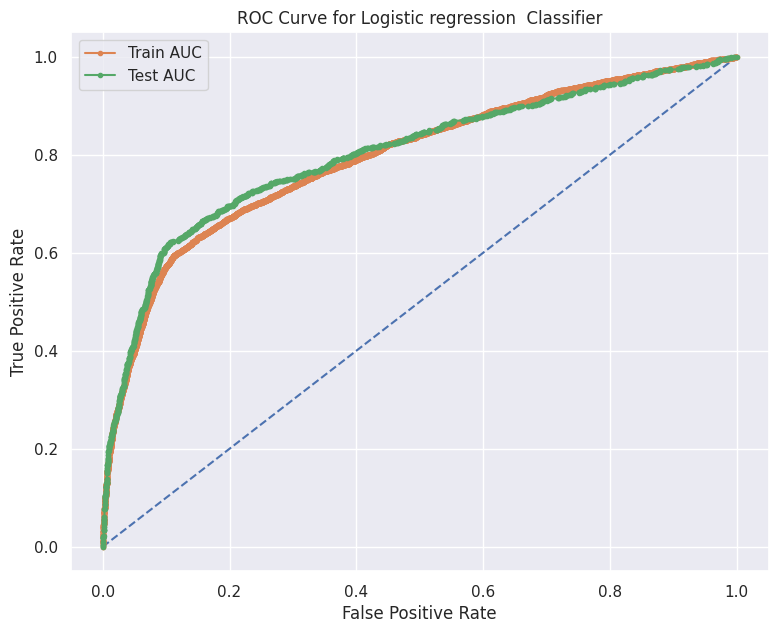

--------------------------------------------------
Classification report of Logistic regression classifer
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7310
           1       0.37      0.65      0.47       928

    accuracy                           0.84      8238
   macro avg       0.66      0.75      0.69      8238
weighted avg       0.88      0.84      0.85      8238

--------------------------------------------------
Confusion matrix


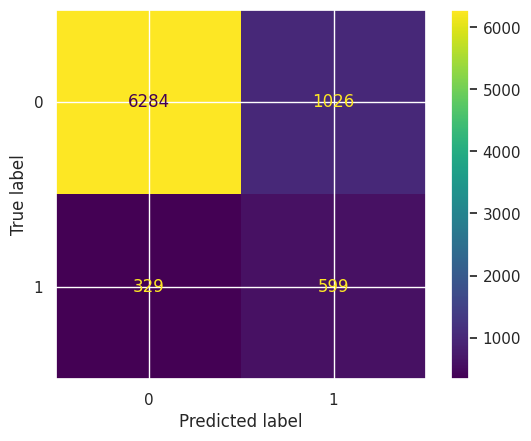

In [23]:
# logistic regression model
log_clf = LogisticRegression(C=0.61, solver='liblinear', class_weight='balanced')
train_model(log_clf, X_train, X_test, y_train, y_test, title="Logistic regression")

#### 2. KNN classifier

**************************************************
Train AUC: 0.829
Test AUC: 0.793
**************************************************
Train Accuracy: 0.901
Test Accuracy: 0.902


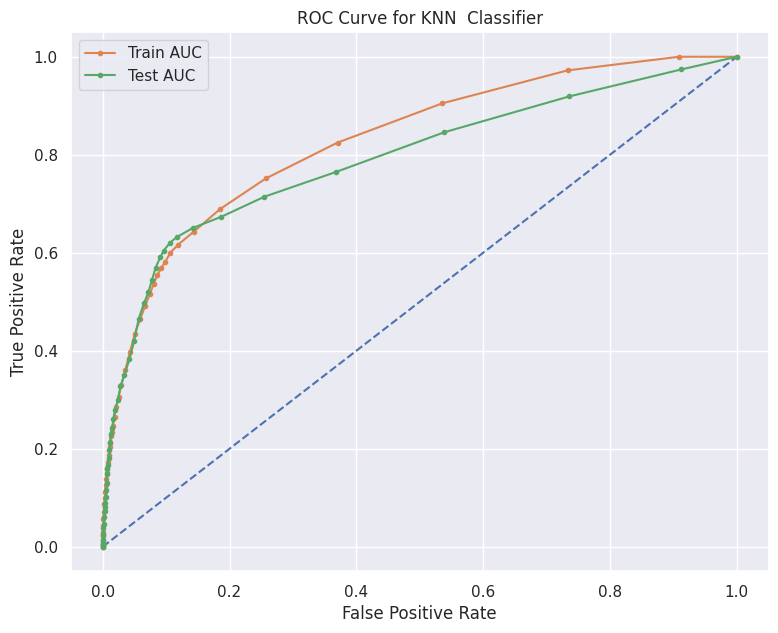

--------------------------------------------------
Classification report of KNN classifer
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.70      0.23      0.35       928

    accuracy                           0.90      8238
   macro avg       0.80      0.61      0.65      8238
weighted avg       0.89      0.90      0.88      8238

--------------------------------------------------
Confusion matrix


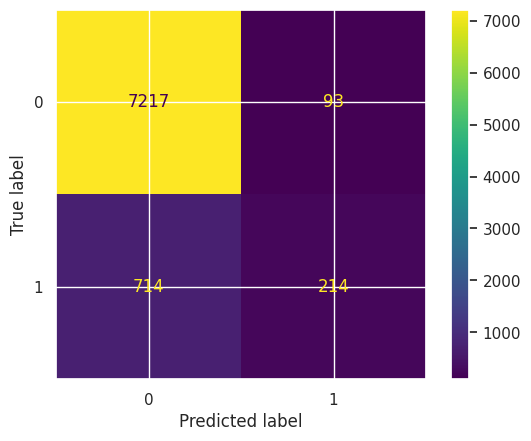

In [24]:
knn_clf = KNeighborsClassifier(n_neighbors=49, n_jobs=-1)
train_model(knn_clf, X_train, X_test, y_train, y_test, title="KNN")

### Tree-based Classifiers

In [25]:
params = {
    'n_estimators':[10, 20, 50, 100, 150],
    'max_depth':[3, 5, 10, 15, 25]}
model = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
clf = RandomizedSearchCV(model, param_distributions=params, cv=5, scoring='roc_auc',
                         random_state=42, n_jobs=-1, return_train_score=True)
clf.fit(X_train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'n_estimators': 100, 'max_depth': 10}
Best score: 0.7961053051490035


#### Now that we have the best parameters for the random forrest classifier, let's retrain an rf_classifier with the best parameters and plot the results
##### 1. Random Forest classifier

**************************************************
Train AUC: 0.855
Test AUC: 0.811
**************************************************
Train Accuracy: 0.859
Test Accuracy: 0.860


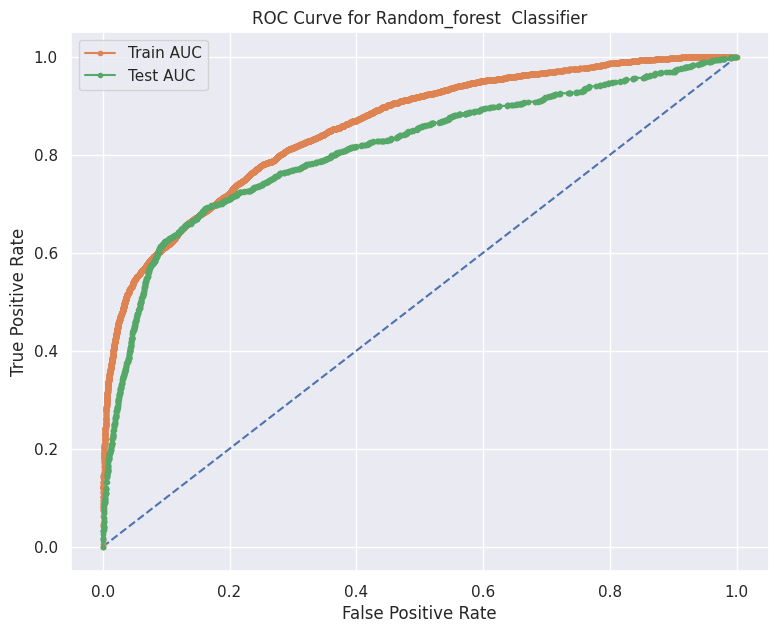

--------------------------------------------------
Classification report of Random_forest classifer
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      7310
           1       0.42      0.63      0.50       928

    accuracy                           0.86      8238
   macro avg       0.69      0.76      0.71      8238
weighted avg       0.89      0.86      0.87      8238

--------------------------------------------------
Confusion matrix


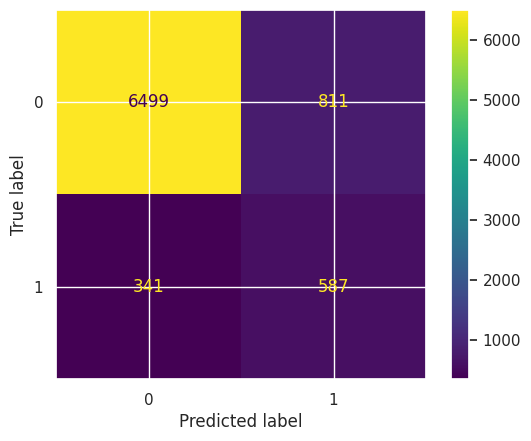

In [26]:
# Instantiate a random forest classifier with the best parameters found
rf_clf = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=10, n_jobs=-1, random_state=42)
# Train and display its results
train_model(rf_clf, X_train, X_test, y_train, y_test, title="Random_forest")

##### 2. XGBoost classifier

**************************************************
Train AUC: 0.805
Test AUC: 0.810
**************************************************
Train Accuracy: 0.903
Test Accuracy: 0.901


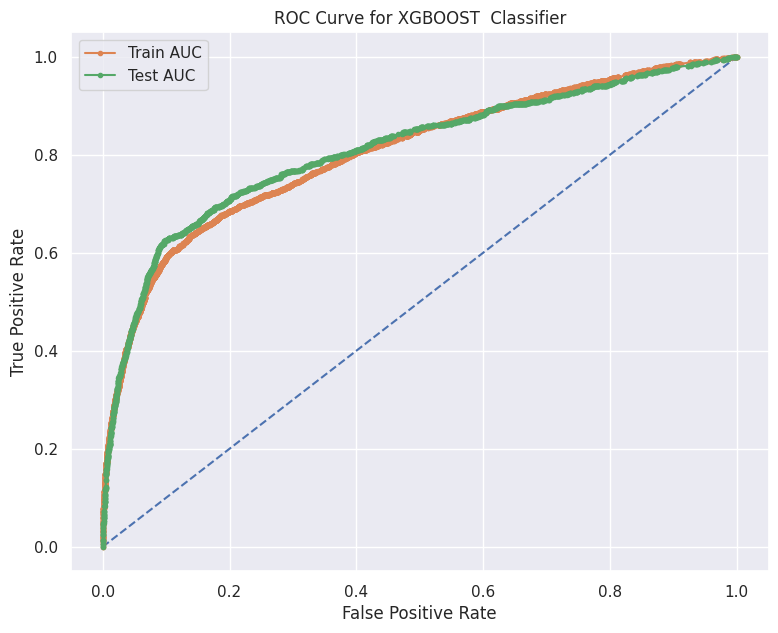

--------------------------------------------------
Classification report of XGBOOST classifer
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.75      0.18      0.29       928

    accuracy                           0.90      8238
   macro avg       0.83      0.59      0.62      8238
weighted avg       0.89      0.90      0.87      8238

--------------------------------------------------
Confusion matrix


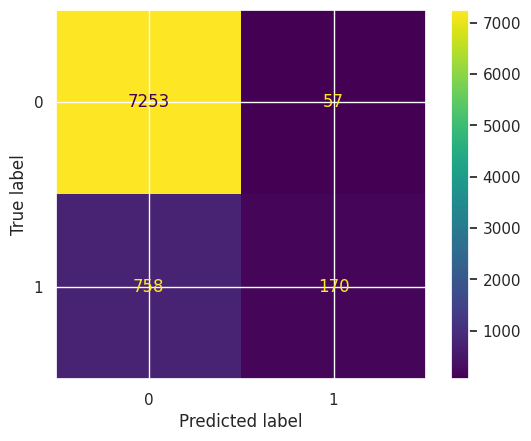

In [27]:
folds = 3
param_comb = 5
params={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
        'n_estimators':[10, 20, 50, 100, 150, 200, 250],
        'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)

xgb_clf = XGBClassifier(random_state=42)


xgb_random_search = RandomizedSearchCV(xgb_clf, param_distributions=params ,n_iter=param_comb,
                                    scoring='roc_auc', n_jobs=4, random_state=42)
train_model(xgb_random_search, X_train, X_test, y_train, y_test, title="XGBOOST")

### Few points to note:
- Even though the classifiers have achieved very high accuracy and AUC scores, they aren't really performing well on the positive class samples
- This is Evident by observing the precision, recall, and f1-scores. The confusion matrix further makes this obvious.
- To overcome this, we should perform sampling to balance the class distribution to help the models perform better

In [28]:
# Performing oversampling to rectify the class imbalance issue
over_samp = SMOTETomek(random_state=42)
X_resamp, y_resamp = over_samp.fit_resample(input_features[most_important_features], targets)

original_class_dist = Counter(targets)
resampled_class_dist = Counter(y_resamp)
print(f'Class distribution of original dataset is: {original_class_dist}')
print(f'Class distribution of resampled dataset shape is: {resampled_class_dist}')

Class distribution of original dataset is: Counter({0: 36548, 1: 4640})
Class distribution of resampled dataset shape is: Counter({0: 36389, 1: 36389})


In [29]:
# Split the dataset into train-test
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_resamp, y_resamp, test_size=0.2, random_state=42)

In [30]:
# Create and fit scaler
scaler = StandardScaler()
scaler.fit(X_train_res[cols_to_scale])

# Apply scaler to selected features of the training dataset
X_train_res[cols_to_scale] = scaler.transform(X_train_res[cols_to_scale])

# Apply the scaler to the selected features of the test dataset
X_test_res[cols_to_scale] = scaler.transform(X_test_res[cols_to_scale])

### Training the Logistic Regression classifier with the oversampled dataset

**************************************************
Train AUC: 0.908
Test AUC: 0.909
**************************************************
Train Accuracy: 0.830
Test Accuracy: 0.832


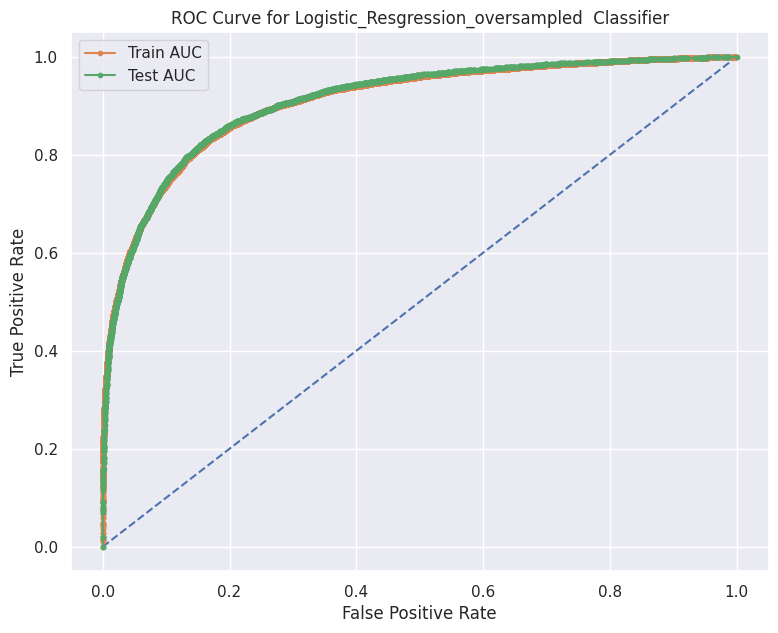

--------------------------------------------------
Classification report of Logistic_Resgression_oversampled classifer
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      7278
           1       0.84      0.81      0.83      7278

    accuracy                           0.83     14556
   macro avg       0.83      0.83      0.83     14556
weighted avg       0.83      0.83      0.83     14556

--------------------------------------------------
Confusion matrix


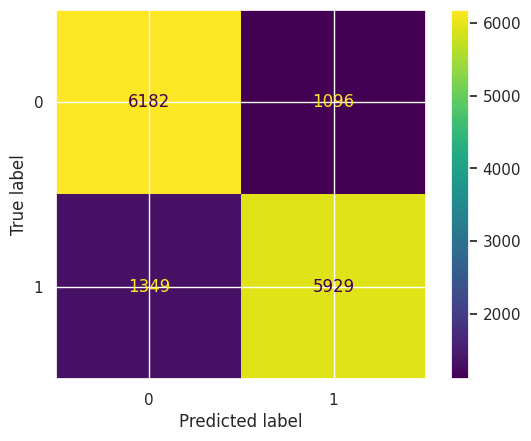

In [31]:
# Instantiate the models and train them simultaneously
log_clf = LogisticRegression(C=0.61, solver='liblinear', class_weight='balanced')
train_model(log_clf, X_train_res, X_test_res, y_train_res, y_test_res, title="Logistic_Resgression_oversampled")

### Training the KNN classifier with the oversampled dataset

**************************************************
Train AUC: 0.921
Test AUC: 0.915
**************************************************
Train Accuracy: 0.834
Test Accuracy: 0.830


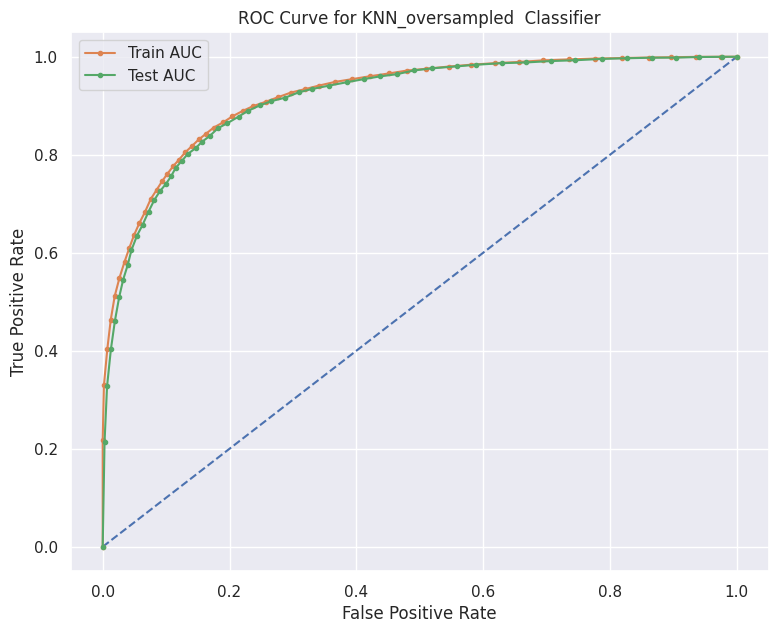

--------------------------------------------------
Classification report of KNN_oversampled classifer
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      7278
           1       0.80      0.89      0.84      7278

    accuracy                           0.83     14556
   macro avg       0.84      0.83      0.83     14556
weighted avg       0.84      0.83      0.83     14556

--------------------------------------------------
Confusion matrix


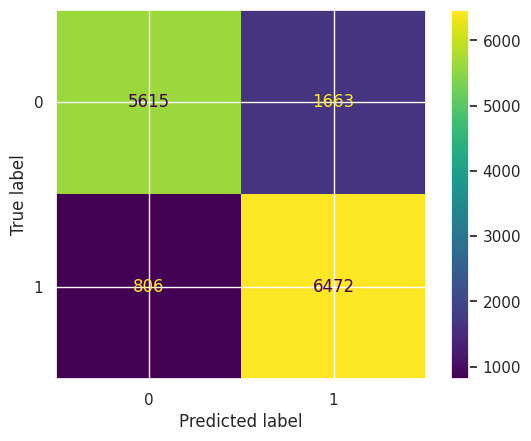

In [32]:
knn_clf = KNeighborsClassifier(n_neighbors=49, n_jobs=-1)
train_model(knn_clf, X_train_res, X_test_res, y_train_res, y_test_res, title="KNN_oversampled")

### Training the random forest classifier with the oversampled dataset

**************************************************
Train AUC: 0.921
Test AUC: 0.914
**************************************************
Train Accuracy: 0.821
Test Accuracy: 0.814


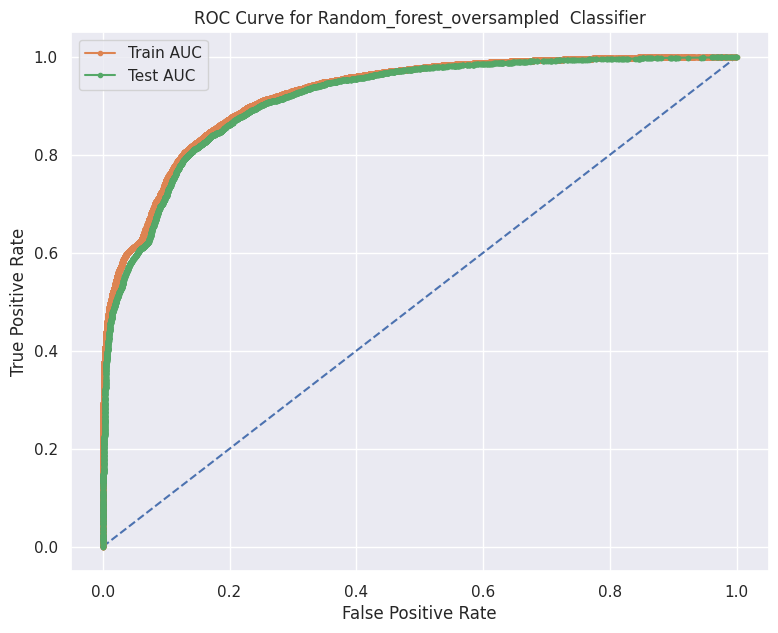

--------------------------------------------------
Classification report of Random_forest_oversampled classifer
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.89      0.83      7278
           1       0.87      0.73      0.80      7278

    accuracy                           0.81     14556
   macro avg       0.82      0.81      0.81     14556
weighted avg       0.82      0.81      0.81     14556

--------------------------------------------------
Confusion matrix


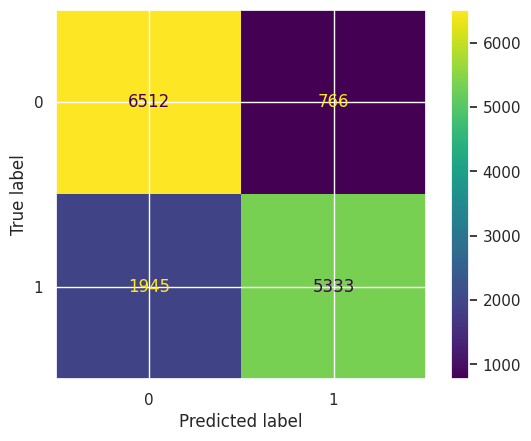

In [33]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42)
train_model(rf_clf, X_train_res, X_test_res, y_train_res, y_test_res, title="Random_forest_oversampled")

### Training the XGBoost classifier with the over sampled dataset

**************************************************
Train AUC: 0.931
Test AUC: 0.928
**************************************************
Train Accuracy: 0.859
Test Accuracy: 0.856


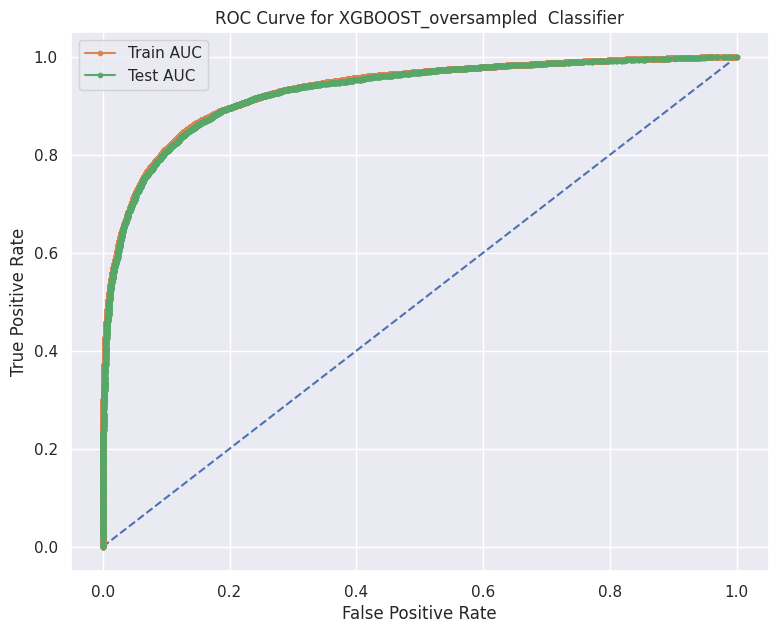

--------------------------------------------------
Classification report of XGBOOST_oversampled classifer
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      7278
           1       0.87      0.84      0.85      7278

    accuracy                           0.86     14556
   macro avg       0.86      0.86      0.86     14556
weighted avg       0.86      0.86      0.86     14556

--------------------------------------------------
Confusion matrix


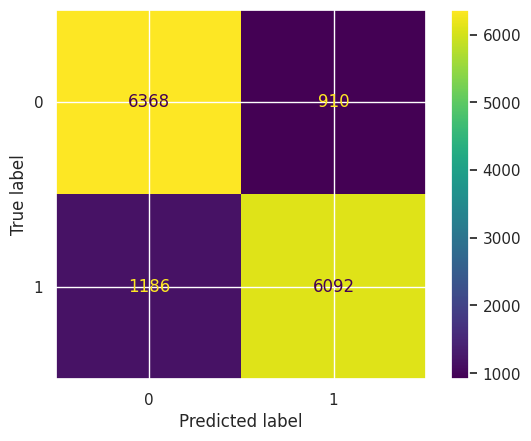

In [34]:
folds = 3
param_comb = 5
params={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
        'n_estimators':[10, 20, 50, 100, 150, 200, 250],
        'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
xgb_clf = XGBClassifier(random_state=42)
xgb_random_search = RandomizedSearchCV(xgb_clf, param_distributions=params ,n_iter=param_comb,
                                    scoring='roc_auc', n_jobs=4, random_state=42)
train_model(xgb_random_search, X_train_res, X_test_res, y_train_res, y_test_res, title="XGBOOST_oversampled")

In [35]:
# Create a dataframe from the scores of the different models
models_performances = pd.DataFrame.from_dict(scores)
models_performances = models_performances.T
models_performances.columns = ["Train_AUC", "Test AUC", "Train_ACC", "Test ACC", "F1_score", "Precision_score"]
models_performances.sort_values(by=['Precision_score'], ascending=False)

,Train_AUC,Test AUC,Train_ACC,Test ACC,F1_score,Precision_score
Random_forest_oversampled,0.921405,0.913702,0.821133,0.813754,0.797339,0.874406
XGBOOST_oversampled,0.930680,0.928463,0.858782,0.856004,0.853221,0.870037
Logistic_Resgression_oversampled,0.907545,0.908942,0.829875,0.832028,0.829057,0.843986
KNN_oversampled,0.920979,0.914878,0.834358,0.830379,0.839811,0.795575
XGBOOST,0.804687,0.810377,0.902549,0.901068,0.294372,0.748899
KNN,0.828516,0.792845,0.901062,0.902039,0.346559,0.697068
Random_forest,0.855038,0.811296,0.858725,0.860160,0.504729,0.419886
Logistic regression,0.794373,0.801411,0.829287,0.835518,0.469252,0.368615


### Comments on the obtained results
- We can see that all the ML models employed in this project had a pretty good accuracy score (above 80%)  both in training and testing. None of the chosen algorithms showed any sign of overfitting. This can be attributed to the fact that we carefully selected the most informative features, hence preventing the chosen models from learning noise (which often results from the inclusion of non-informative features). However, as explained ealier on, accuracy isn't the most accurate performance measure metric when the dataset is highly imbalanced. For instance, the models could just classify sample as "no" (responded negatively to the campaign) and still achieve an accuracy score about 88% in the original dataset. For this reason, we are must interested in accurately identifying individuals who are more likely to respond positively to the campaign, hence precision emerging as a good performance metric. In addition, performing oversampling to have an equal class distribution will help improve the precision scores of the chosen algorithms.
- For the original dataset, the XGBOOST classifier had the best precision score (about 74%) followed by the KNN classifier (70%).
- We can see that after oversampling has been performed, the precision scores of all the models increased significantly as expected. the Random Forest classifier (87.3%) leads with a marginal win over the XGBOOST classifier (87%). The two other algorithms have achieved great precision scores.
- Relying on precision, the two best classifers are the XGBOOST and Random Forest classifiers. Their relatively high performance can be attributed to the fact that these two classifiers combine multiple weak learners to come about with their final predictitons. In other words, they are ensemble-based algorithms and often achieve relatively bettter performance in relatively complex problems like this task.
##### Overall best model: XGBOOST classifier (based on precision and accuracy scores)